# Исследование сервиса аренды самокатов GoFast

## Описание и цель проекта:
Необходимо проанализировать данные сервиса аренды самокатов GoFast и проверить ряд  гипотез, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:
 - без подписки:
            абонентская плата отсутствует;
            стоимость одной минуты поездки — 8 рублей;
            стоимость старта (начала поездки) — 50 рублей;
 - с подпиской Ultra
            абонентская плата — 199 рублей в месяц;
            стоимость одной минуты поездки — 6 рублей;
            стоимость старта — бесплатно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Подготовка данных

### Загрузка и изучение общей информации

In [2]:
user = pd.read_csv('/datasets/users_go.csv') #чтение файла /datasets/users_go.csv
pd.set_option('display.max_columns', None) #устанавливаем параметры, чтобы отображались все столбцы таблицы
display (user.head()) #вывод первых пяти строк
print (user.info()) #вывод общей информации о DataFrame

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


In [3]:
ride = pd.read_csv('/datasets/rides_go.csv') #чтение файла /datasets/rides_go.csv
#ride = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
display (ride.head()) #вывод первых пяти строк
print (ride.info()) #вывод общей информации о DataFrame

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


In [4]:
subscription = pd.read_csv('/datasets/subscriptions_go.csv') #чтение файла /datasets/subscriptions_go.csv
display (subscription.head()) #вывод первых пяти строк
print (subscription.info()) #вывод общей информации о DataFrame

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


### Промежуточный вывод:
 - таблицы не имеют нулевых значений;
 - столбцы названы корректно, переименование не требуется;
 - в датафрейме с информацией о поездках (ride) необходимо привести столбец date к типу даты pandas.

## Предобработка данных

### Что требуется сделать в рамках предобработки данных
В загруженных выше данных представлена информация о пользователях сервиса аренды самокатов, их поездках и подписках.
При изучении общей информации о каждом из датафреймов видим, что все значения не нулевые, но в датафрейме с информацией о поездках (ride) необходимо привести столбец date к типу даты pandas.
Таже создадим новый столбец с номером месяца на основе столбца date.

In [5]:
ride['date']=pd.to_datetime(ride['date'])
ride ['month'] = ride['date'].dt.month #месяц совершения поездки;
display (ride.head()) #вывод первых пяти строк
print (ride.info()) #вывод общей информации о DataFrame с целью проверки выполненного изменения типа данных

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
None


Проверим наличие дубликатов в датафреймах user и ride (в датафрейме subscription всего две строки, можно наглядно увидеть отсутствие дубликатов и пустых значений).

In [6]:
print('Количество дубликатов в датафрейме user:', user.duplicated().sum())
print('Количество дубликатов в датафрейме ride:', ride.duplicated().sum())

Количество дубликатов в датафрейме user: 31
Количество дубликатов в датафрейме ride: 0


Удалим дубликаты в датафрейме user.

In [7]:
user=user.drop_duplicates()
print('Количество дубликатов в датафрейме user:', user.duplicated().sum())

Количество дубликатов в датафрейме user: 0


Убедимся также, что в датафрейме user нет неявных дубликатов в названиях городов, для этого выведем все уникальные значения столбца (результат выполнения команды ниже показывает, что неявных дубликатов нет).

In [8]:
user['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Узнаем, за какой период представлены данные о поездках:

In [9]:
print('Данные представлены за период с:', ride['date'].min(), 'по', ride['date'].max())

Данные представлены за период с: 2021-01-01 00:00:00 по 2021-12-30 00:00:00


Данные представлены за один календарный год, соответственно, можем быть уверены, что данные за несколько лет не склеятся при агрегации по месяцам.

### Промежуточный вывод:
В рамках предобработки данных исправлены форматы данных, удалены дубликаты, а также проверены данные на наличие неявных дубликатов.

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

### Частота встречаемости городов
Из представленных ниже данных видим, что больше всего пользователей в Пятигорске, меньше всего в Москве (но разброс данных небольшой).

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

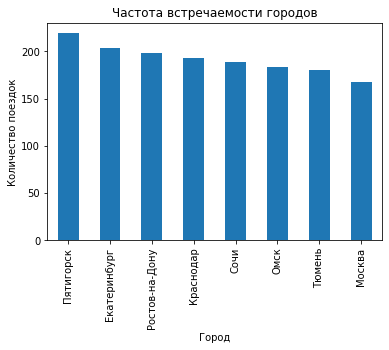

In [10]:
user['city'].value_counts().plot.bar(title = 'Частота встречаемости городов', xlabel='Город', ylabel='Количество поездок')
user['city'].value_counts()

### Соотношение пользователей с подпиской и без подписки
Из диаграммы ниже видим, что пользователей без подписки больше (соотношение двух параметров наглядно показывает круговая диаграмма).

free     835
ultra    699
Name: subscription_type, dtype: int64

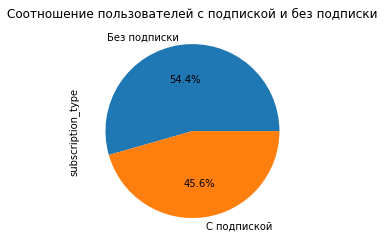

In [11]:
user['subscription_type'].value_counts().plot(kind='pie', title='Соотношение пользователей с подпиской и без подписки', autopct='%1.1f%%', labels=['Без подписки','С подпиской'])
user['subscription_type'].value_counts()

### Возраст пользователей
Из представленных ниже данных видим, что возраст пользователей варьируется от 12 до 43 лет, при этом наибольшим спросом сервис пользуется у людей в возрасте от 15 до 35 лет(+1.5 std к Q3 (Q3=28 лет) и -1.5 std от Q1 (Q1=22 года)).

age
12      4
13      8
14      9
15     13
16     19
17     26
18     46
19     47
20     71
21     93
22    119
23    129
24    132
25    145
26    131
27    119
28    112
29     68
30     68
31     48
32     41
33     39
34     19
35     15
36      6
37      2
38      3
39      1
43      1
Name: age, dtype: int64


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

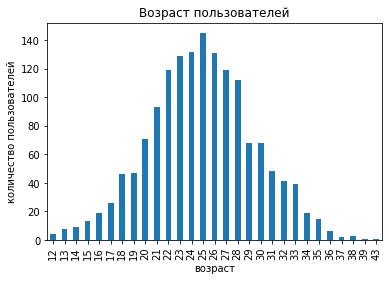

In [12]:
user.groupby('age')['age'].count().plot.bar(title='Возраст пользователей', xlabel='возраст', ylabel='количество пользователей')
print (user.groupby('age')['age'].count())
user['age'].describe()

### Расстояние, которое пользователь преодолел за одну поездку
Из графика ниже видим, что в основном пользователи совершают поездки от 2 до примерно 4,6 км, также следует отметить, что есть закономерность и в коротких поездках - среди коротких поездок в лидерах поездки около 700 метров.
Если рассмотреть описание диаграмму размаха, то наиболее популярные поездки лежат в промежутке от 870 метров (Q1-1.5*std) до 5 450 метров (Q3+1.5std).

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


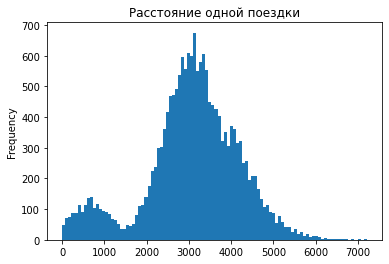

In [13]:
ride['distance'].plot.hist(bins=100, title='Расстояние одной поездки', xlabel='расстояние поездки')
ride.describe() #выведем числовое описание диаграммы размаха для оценки представленных данных


### Продолжительность поездок
Из графика ниже видно, что в основном поездка длится от 5 до 30 минут.

<AxesSubplot:title={'center':'Продолжительность поездки'}, ylabel='Frequency'>

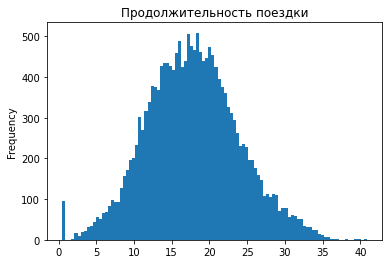

In [14]:
ride['duration'].plot.hist(bins=100, title='Продолжительность поездки')

Также видим аномальный скачок около значения времени = 1. Выведем эти строки.

In [15]:
display(ride.query('duration<1'))
print ('Минимальное значение расстояния при поездке менее 1 минуты =', ride.query('duration<1')['distance'].min())
print ('Максимальное значение расстояния при поездке менее 1 минуты =', ride.query('duration<1')['distance'].max())

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Минимальное значение расстояния при поездке менее 1 минуты = 4030.308008428866
Максимальное значение расстояния при поездке менее 1 минуты = 7211.007744598519


Проехать от 4 до 7,2 км за полминуты нереально, заменим аномальные значения: для этого сначала вычислим среднюю скорость при поездке и разделим расстояние на среднюю скорость.

<AxesSubplot:title={'center':'Продолжительность поездки'}, ylabel='Frequency'>

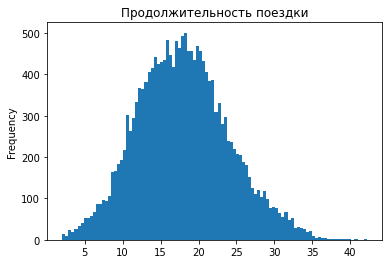

In [16]:
average_speed = ride.query('duration>1')['distance'].sum()/ride.query('duration>1')['duration'].sum() #средняя скорость при поездке
ride.loc[ride['duration']<1, 'duration']=ride['distance']/average_speed
ride['duration'].plot.hist(bins=100, title='Продолжительность поездки')

### Промежуточный вывод:
В данном разделе мы описали и визуализировали общую информацию о пользователях и поездках:
 - частота встречаемости городов;
 - соотношение пользователей с подпиской и без подписки;
 - возраст пользователей;
 - расстояние, которое пользователь преодолел за одну поездку;
 - продолжительность поездок.
 
Полученные данные в дальнейшем помогут сделать выводы о работе сервиса.

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм (data)
Для этого воспользуемся методом merge().

In [17]:
data=user.merge(ride, on='user_id').merge(subscription, on='subscription_type')
display (data)
data.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


### Создадим ещё два датафрейма из датафрейма, созданного на этапе 5.1:
 - c данными о пользователях без подписки (data_ultra);
 - с данными о пользователях с подпиской (data_free).

In [18]:
data_ultra = data.query('subscription_type=="ultra"')
data_free = data.query('subscription_type=="free"')

### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

Сначала рассмотрим данные о расстоянии поездок - из графиков ниже видно, что пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской, но при этом и диапазон расстояния поездок у них шире.

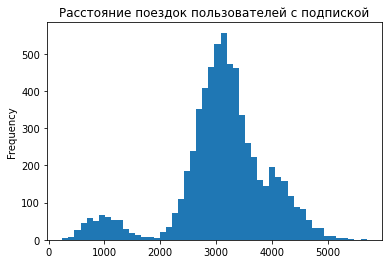

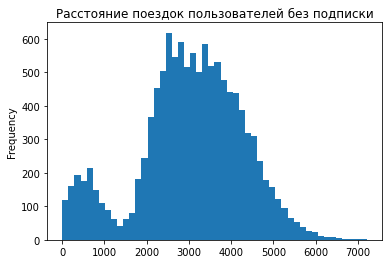

In [19]:
data_ultra['distance'].plot.hist(bins=50, title='Расстояние поездок пользователей с подпиской')
plt.show()
data_free['distance'].plot.hist(bins=50, title='Расстояние поездок пользователей без подписки')
plt.show()

Аналогичный вывод можно сделать и по времени поездок - пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской, но при этом и диапазон времени поездок у них шире.

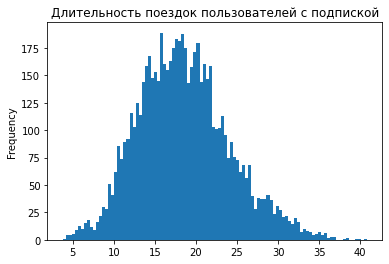

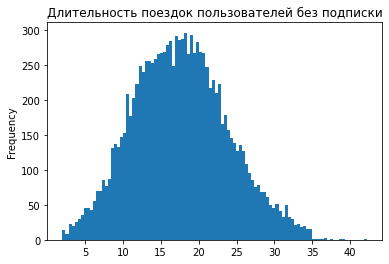

In [20]:
data_ultra['duration'].plot.hist(bins=100, title='Длительность поездок пользователей с подпиской')
plt.show()
data_free['duration'].plot.hist(bins=100, title='Длительность поездок пользователей без подписки')
plt.show()

Построим также графики зависимости расстояния и времени поездки:

<AxesSubplot:title={'center':'Поездки пользователей без подписки'}, xlabel='продолжительность', ylabel='расстояние'>

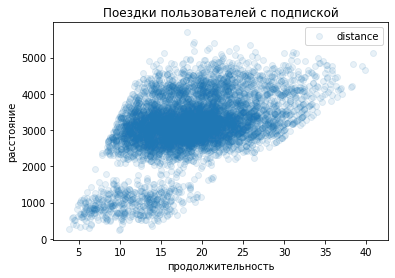

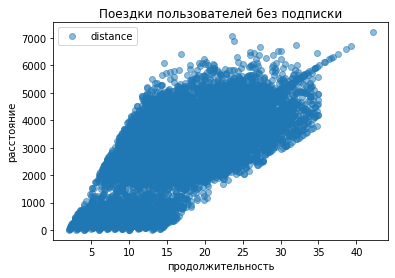

In [21]:
data_ultra.plot(x='duration', y='distance', style='o', alpha=0.1, title='Поездки пользователей с подпиской', xlabel='продолжительность', ylabel='расстояние')
data_free.plot(x='duration', y='distance', style='o', alpha=0.5, title='Поездки пользователей без подписки', xlabel='продолжительность', ylabel='расстояние')


### Промежуточный вывод
В данном подразделе мы объединили данные о пользователях, поездках и подписках в один датафрейм, на его основе создали ещё два датафрейма из датафрейма (c данными о пользователях без подписки и с данными о пользователях с подпиской), а также визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.
На основании полученных данных можно сделать вывод, что пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской, но при этом и диапазон расстояния поездок у них шире. Аналогичный вывод можно сделать и по времени поездок - пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской, но при этом и диапазон времени поездок у них шире.

## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными
Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

In [22]:
data['duration'] = np.ceil(data['duration']) # округление времени каждой поездки до следующего целого числа
data_new = data.pivot_table(index=['user_id', 'subscription_type', 'month'], values=['distance','duration'], aggfunc={'distance':'sum', 'duration':'sum', 'month':'count'})
data_new = data_new.rename (columns = {'month' : 'ride_count'}) #переименовываем столбец с количеством поездок, совершенных пользователем в месяц
data_new

distance  duration  ride_count
user_id subscription_type month                                    
1       ultra             1       7027.511294      42.0           2
                          4        754.159807       7.0           1
                          8       6723.470560      46.0           2
                          10      5809.911100      32.0           2
                          11      7003.499363      56.0           3
...                                       ...       ...         ...
1534    free              6       3409.468534      26.0           2
                          8       7622.453034      48.0           2
                          9       4928.173852      23.0           1
                          11     13350.015305      78.0           4
                          12      2371.711192      16.0           1

[11331 rows x 3 columns]

### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь


In [23]:
data_new = data_new.reset_index()
data_new

,user_id,subscription_type,month,distance,duration,ride_count
0,1,ultra,1,7027.511294,42.0,2
1,1,ultra,4,754.159807,7.0,1
2,1,ultra,8,6723.470560,46.0,2
3,1,ultra,10,5809.911100,32.0,2
4,1,ultra,11,7003.499363,56.0,3
...,...,...,...,...,...,...
11326,1534,free,6,3409.468534,26.0,2
11327,1534,free,8,7622.453034,48.0,2
11328,1534,free,9,4928.173852,23.0,1
11329,1534,free,11,13350.015305,78.0,4


In [24]:
#создадим функцию для подсчета выручки
def revenue (df):
    user_id = df['user_id']
    subscription_type = df['subscription_type']
    for i in range(len(subscription)):
        if subscription_type==subscription.loc[i,'subscription_type']:
            revenue=subscription.loc[i,'start_ride_price']*df['ride_count']+subscription.loc[i,'minute_price']*df['duration']+subscription.loc[i,'subscription_fee']
            return revenue
        
#посчитаем выручку, которую принёс каждый пользователь
data_new['revenue']=data_new.apply(revenue, axis=1)

data_new

,user_id,subscription_type,month,distance,duration,ride_count,revenue
0,1,ultra,1,7027.511294,42.0,2,451.0
1,1,ultra,4,754.159807,7.0,1,241.0
2,1,ultra,8,6723.470560,46.0,2,475.0
3,1,ultra,10,5809.911100,32.0,2,391.0
4,1,ultra,11,7003.499363,56.0,3,535.0
...,...,...,...,...,...,...,...
11326,1534,free,6,3409.468534,26.0,2,308.0
11327,1534,free,8,7622.453034,48.0,2,484.0
11328,1534,free,9,4928.173852,23.0,1,234.0
11329,1534,free,11,13350.015305,78.0,4,824.0


### Промежуточный вывод
В данном разделе создан датафрейм с агрегированными данными о поездках: подсчитано суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также выручка, которую принёс каждый пользователь.

## Проверка гипотез

### Гипотеза 1
Важно понять, тратят ли пользователи с подпиской больше времени на поездки.
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. 

Проведем двухвыборочный t-тест для независимых выборок - data_ultra и data_free.

Нулевая гипотеза: средние значения времени на поездки пользователей из двух групп равны.

Альтернативная гипотеза: среднее значение времени на поездки пользователей с подпиской больше, чем среднее значение времени на поездки пользователей без подписки.

In [25]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.697079402256401e-23
Отвергаем нулевую гипотезу


Следовательно, можем предположить, что среднее значение времени на поездки пользователей с подпиской больше, чем среднее значение времени на поездки пользователей без подписки.

### Гипотеза 2
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 

Нулевая гипотеза: среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

Альтернативная гипотеза: подписчики в среднем проезжают расстояние больше оптимального.

In [26]:
value = 3130 #оптимальное расстояние с точки зрения износа самоката
alpha = 0.05 #уровень статистической значимости

results = st.ttest_1samp(data_ultra['distance'], value, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue) < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Следовательно, можем предположить, что среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

### Гипотеза 3
Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше выручки от пользователей без подписки.

In [27]:
#выручка от пользователей с подпиской по месяцам
data_new_ultra = data_new.query('subscription_type=="ultra"')
#выручка от пользователей без подписки по месяцам
data_new_free = data_new.query('subscription_type=="free"')

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(data_new_ultra['revenue'], data_new_free['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.391432442479095e-26
Отвергаем нулевую гипотезу


Не совсем понимаю вывод, так как из данных, наоборот, видно, что выручка от пользователей по подписке хоть и немного, но выше

### Гипотеза 4
Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
Для проверки такой гипотезы понадобится двухвыборочный t-тест для зависимых выборок (такой тест проверяет гипотезу о том, что до изменения среднее значение переменной в генеральной совокупности было больше, чем после изменения).

### Гипотеза 4
 
Для проверки такой гипотезы понадобится односторонний тест для зависимых выборок.

Нулевая гипотеза: разница между количеством обращений до обновления и после равна нулю.

Альтернативная гипотеза: количество обращений после обновления меньше, чем до обновления.


### Промежуточный вывод
В данном разделе проверен ряд гипотез, на основании которых можно сделать следующие выводы:
 - среднее значение времени на поездки пользователей с подпиской больше, чем среднее значение времени на поездки пользователей без подписки;
 - среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, примерно равно 3130 метров (оптимальному с точки зрения износа самоката);
 - помесячная выручка от пользователей с подпиской по месяцам выше выручки от пользователей без подписки.

## Распределения

задание не является обязательным, будет выполнено по мере возможности

## Общий вывод
В рамках проекта проанализированы данные сервиса аренды самокатов GoFast и проверен ряд гипотез, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:
 - без подписки:
            абонентская плата отсутствует;
            стоимость одной минуты поездки — 8 рублей;
            стоимость старта (начала поездки) — 50 рублей;
 - с подпиской Ultra
            абонентская плата — 199 рублей в месяц;
            стоимость одной минуты поездки — 6 рублей;
            стоимость старта — бесплатно.
            
На первом этапе выполнена загрузка данных, сделаны следующие промежуточные выводы о качестве данных:
 - таблицы не имеют нулевых значений;
 - столбцы названы корректно, переименование не требуется;
 - в датафрейме с информацией о поездках (ride) необходимо привести столбец date к типу даты pandas.
 
В рамках следующего этапа (предобработки данных) исправлены форматы данных, удалены дубликаты, а также проверены данные на наличие неявных дубликатов.

Нами были описана и визуализирована общая информация о пользователях и поездках, а именно:
 - частота встречаемости городов - из полученных данных сделан вывод, что больше всего пользователей в Пятигорске, меньше всего в Москве (но разброс данных небольшой);
 - соотношение пользователей с подпиской и без подписки - на основании полученных данных сделан вывод, что пользователей без подписки больше - 54,4% проти 45,6% пользователей с подпиской;
 - возраст пользователей - сделан вывод, что возраст пользователей варьируется от 12 до 43 лет, при этом наибольшим спросом сервис пользуется у людей в возрасте от 15 до 35 лет;
 - расстояние, которое пользователь преодолел за одну поездку - в основном пользователи совершают поездки от 2 до примерно 4,6 км, также следует отметить, что есть закономерность и в коротких поездках - среди коротких поездок в лидерах поездки около 700 метров;
 - продолжительность поездок - в основном поездка длится от 5 до 30 минут.

В рамках проекта мы также объединили данные о пользователях, поездках и подписках, а также визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.
На основании полученных данных можно сделать вывод, что пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской, но при этом и диапазон расстояния поездок у них шире. Аналогичный вывод можно сделать и по времени поездок - пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской, но при этом и диапазон времени поездок у них шире.

Для подтверждения интересующих нас гипотез создана таблица с агрегированными данными о поездках: подсчитано суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также выручка, которую принёс каждый пользователь.

На основании проведенного анализа данных проверен ряд гипотез, на основании которых можно сделать следующие выводы:
 - среднее значение времени на поездки пользователей с подпиской больше, чем среднее значение времени на поездки пользователей без подписки;
 - среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, примерно равно 3130 метров (оптимальному с точки зрения износа самоката);
 - помесячная выручка от пользователей с подпиской по месяцам выше выручки от пользователей без подписки.